In [2]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
# Load datasets
cora_edges = pd.read_csv("/Users/soniaborsi/Desktop/Adversarial-Attack-GNN/data/cora/cora.cites", sep='\t', header=None)
citeseer_edges = pd.read_csv("/Users/soniaborsi/Desktop/Adversarial-Attack-GNN/data/citeseer/citeseer.cites", sep='\t', header=None)

In [8]:
# Create directed graphs
G_cora = nx.DiGraph()
G_cora.add_edges_from(cora_edges.values)

G_citeseer = nx.DiGraph()
G_citeseer.add_edges_from(citeseer_edges.values)

In [9]:
# Function to extract largest connected component for visualization
def get_largest_component(graph, sample_size=1000):
    largest_cc = max(nx.weakly_connected_components(graph), key=len)
    subgraph = graph.subgraph(largest_cc).copy()
    if len(subgraph.nodes) > sample_size:
        nodes_sample = list(subgraph.nodes)[:sample_size]
        return subgraph.subgraph(nodes_sample).copy()
    return subgraph

In [16]:
# Extract manageable subgraphs
G_cora_sub = get_largest_component(G_cora, sample_size=500)
G_citeseer_sub = get_largest_component(G_citeseer, sample_size=500)

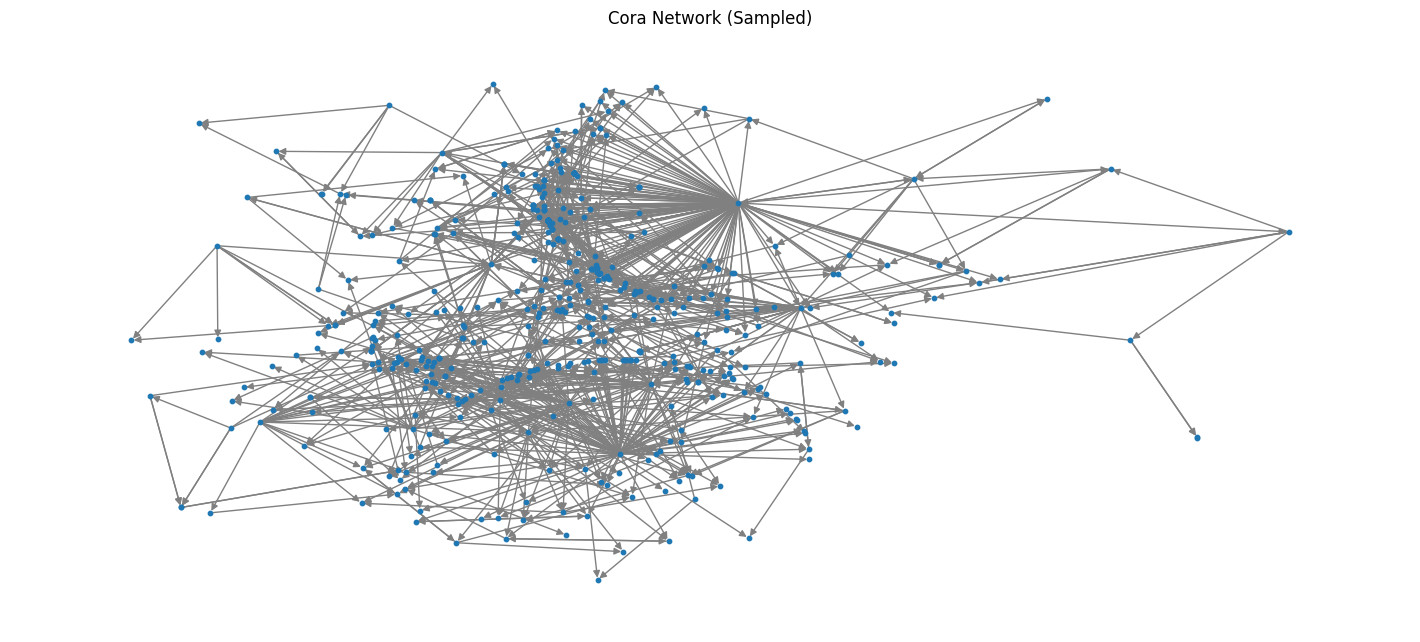

In [18]:
# Plot the subgraphs
plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
nx.draw_kamada_kawai(G_cora_sub, node_size=10, edge_color='gray', with_labels=False)
plt.title("Cora Network (Sampled)")

output_path = "/Users/soniaborsi/Desktop/Adversarial-Attack-GNN/viz/output/cora_visualization.png"
plt.savefig(output_path, dpi=300)
plt.show()
